In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [22]:
X, y = torch.load('C:\\Users\\kishki\\Documents\\AI\Datasets\\MNIST\\processed\\training.pt')

In [23]:
X.shape

torch.Size([60000, 28, 28])

In [24]:
X[2]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,  62,  81,   0,   

In [25]:
y

tensor([5, 0, 4,  ..., 5, 6, 8])

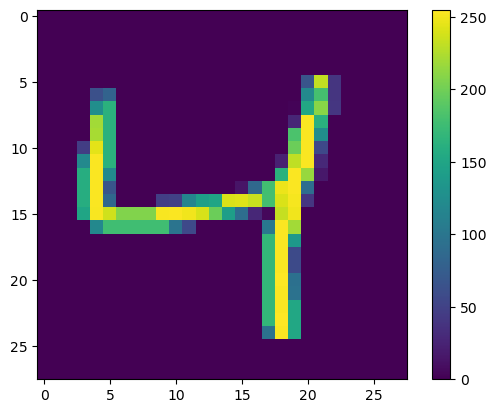

In [26]:
plt.imshow(X[2].numpy())
plt.colorbar()
plt.show()

In [29]:
y_hot = F.one_hot(y, num_classes=10)
y_hot.shape

torch.Size([60000, 10])

In [31]:
class CTDataset(Dataset):
    def __init__(self, filepath):
        self.X, self.y = torch.load(filepath)
        self.X = self.X / 255.
        self.y = F.one_hot(self.y, num_classes=10).to(float)
    def __len__(self):
        return self.X.shape[0]
    def __getitem__(self, ix):
        return self.X[ix], self.y[ix]

In [32]:
train_ds = CTDataset('C:\\Users\\kishki\\Documents\\AI\Datasets\\MNIST\\processed\\training.pt')
test_ds = CTDataset('C:\\Users\\kishki\\Documents\\AI\Datasets\\MNIST\\processed\\test.pt')

In [33]:
len(train_ds)

60000

In [47]:
trainloader = DataLoader(train_ds, batch_size=5)

In [36]:
for X, y in train_loader:
    print(X.shape)
    print(y.shape)
    break

torch.Size([5, 28, 28])
torch.Size([5, 10])


In [37]:
L = nn.CrossEntropyLoss()

In [40]:
class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.M1 = nn.Linear(28**2, 100)
        self.M2 = nn.Linear(100, 50)
        self.M3 = nn.Linear(50, 10)
        self.R = nn.ReLU()
    def forward(self, X):
        X = X.view(-1, 28**2)
        X = self.R(self.M1(X))
        X = self.R(self.M2(X))
        X = self.M3(X)
        return X.squeeze()

In [41]:
f = NN()

In [42]:
f(X)

tensor([[ 0.0088, -0.0105,  0.1002, -0.0818, -0.0857, -0.0563, -0.1188, -0.0784,
          0.0221, -0.1558],
        [ 0.0221, -0.0225,  0.0495, -0.1204, -0.0352, -0.0014, -0.0954, -0.0869,
          0.0319, -0.1530],
        [-0.0071, -0.0327,  0.1004, -0.0408, -0.0206, -0.0386, -0.1174, -0.0779,
         -0.0010, -0.1626],
        [ 0.0130, -0.0128,  0.0846, -0.1095, -0.0386, -0.0301, -0.1035, -0.0826,
          0.0121, -0.1797],
        [-0.0021, -0.0412,  0.0737, -0.0754, -0.0502, -0.0211, -0.1022, -0.0842,
          0.0240, -0.1575]], grad_fn=<SqueezeBackward0>)

In [49]:
def train_model(dl, f, n_epochs=20):
    opt = SGD(f.parameters(), lr=0.01)
    L = nn.CrossEntropyLoss()
    
    loss = []
    epochs = []
    for epoch in range(n_epochs):
        N = len(dl)
        for i, (X, y) in enumerate(dl):
            opt.zero_grad()
            loss_ = L(f(X), y)
            loss_.backward()
            opt.step()
            epochs.append(epoch+i/N)
            loss.append(loss_.item())
        print(f'epoch: {epoch}, loss: {loss[-1]}')
    return np.array(epochs), np.array(loss)

In [50]:
epochs, loss = train_model(trainloader, f)

epoch: 0, loss: 0.003785637097462313
epoch: 1, loss: 0.001435693910389091
epoch: 2, loss: 0.0006668690363312635
epoch: 3, loss: 0.0003201291651748761
epoch: 4, loss: 0.0001812812744447001
epoch: 5, loss: 0.00014596099408095142
epoch: 6, loss: 0.00011113811660692363
epoch: 7, loss: 7.881360306782881e-05
epoch: 8, loss: 4.887264180979401e-05
epoch: 9, loss: 3.6428722091841335e-05
epoch: 10, loss: 2.4746595408942083e-05
epoch: 11, loss: 1.747558167153329e-05
epoch: 12, loss: 1.544908824371305e-05
epoch: 13, loss: 1.5139101185468462e-05
epoch: 14, loss: 6.627943537296232e-06
epoch: 15, loss: 1.1825276395427409e-05
epoch: 16, loss: 8.344493424772282e-06
epoch: 17, loss: 3.7192995236523528e-06
epoch: 18, loss: 1.621240147642311e-06
epoch: 19, loss: 1.1205641385458876e-06


In [65]:
loss_avg = np.reshape(loss, (20, -1)).mean(axis=1)
loss_avg.shape

(20,)

In [66]:
epochs_avg = np.reshape(epochs, (20, -1)).mean(axis=1)
epochs_avg.shape

(20,)

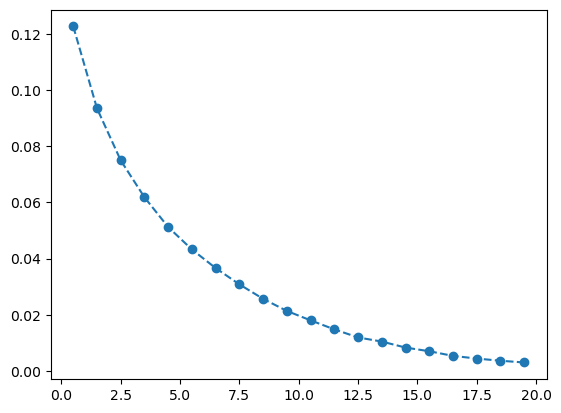

In [67]:
plt.plot(epochs_avg, loss_avg, 'o--')

In [69]:
f.to(device)

NameError: name 'device' is not defined

In [68]:
testloader = DataLoader(test_ds, batch_size=5)

In [73]:
n_correct = 0
n_total = 0
f.eval()

with torch.no_grad():
    for X, y in testloader:
        y_hat = f(X)
        _, y_pred = torch.max(y_hat.data)
        n_total += y.size(0)
        n_correct += (y_pred == y).sum().item()

        print(f'accuracy: {n_correct/n_toal:.3f}')

TypeError: iteration over a 0-d tensor